<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme_cover.gif?raw=true  width='800'/>
</div>



---

<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/shanghai.png?raw=true width='400' />
</div>

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/10.png?raw=true width='800' />
</div>

👇👇👇点击可跳转！

[第一阶段：数据梳理&项目提案](#第一阶段：数据梳理&项目提案)

- [数据梳理](#数据梳理)
   - 1.1 [数据介绍](#数据介绍)
   - 1.2 [数据获取](#数据获取)
- [项目提案](#项目提案)
   - 2.1 [Purpose](#Purpose)
   - 2.2 [Expectation](#Expectation)
   - 2.3 [Outcome](#Outcome)
3. [其他](#其他)

<div class="alert alert-block alert-danger">
<b>注意：</b>

需要翻墙才可下载数据和观看油管视频哦！
    
</div>

<div class="alert alert-block alert-warning">
<center><b>【上海新冠疫情数据分析】项目日志</b></center>

    
第一阶段：【项目提案&数据梳理】


    
**第一节阶段核心目的：**分析研究项目的核心价值、需求逻辑，建立数据分析框架，并完成项目提案的三个过程，以及数据获取和处理。
    
**难度（最高5星）：**⭐⭐⭐
    
**第一阶段周期：** 2022年4月11日 至 2022年4月18日（北京时间）

Good Luck!
</div>


# 第一阶段：数据梳理&项目提案

In [1]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


import re

# data visualization
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# change text color
import colorama
from colorama import Fore, Style

# IPython
from IPython.display import IFrame

## 数据梳理

近日来，中国疫情卷土重来，上海前所未有的严重疫情牵动着全国人民的心。我们希望能够通过Python对中国各省疫情的时间序列进行数据分析、建模及预测。

那么，到底什么是**时间序列**？

> 时间序列的定义

时间序列，是指同一个变量在连续且固定的时间间隔上的各个数据点的集合。

比如每5分钟记录的收费口车流量，或者每年记录的药物销量都是时间序列。

![](https://timeserieslab.com/img/nile.jpeg)

<div class="alert alert-block alert-success"><b>Step 1 </b>

    
那么，本项目中的时间序列是什么呢？


</div>

> 时间序列的类型

根据时间间隔的不同，时间序列可以是按年度(Annual)、季度、月度、周、小时、分钟、秒等频率采集的序列。

> 时间序列的成分 

- 趋势(Trend)，比如长期上涨或长期下跌。
- 季节性(Seasonal)，比如羽绒服的销量一般会在冬季更高，或者某家烧烤店的生意一般会在每周五和周六晚上更好。
- 周期性(Cyclic)，比如你时不时搞个大促，那么销量在那段时间就会比较好。
- 误差。


> Cyclic and seasonal time series: https://robjhyndman.com/hyndsight/cyclicts/

<div align=center>
<img src=https://miro.medium.com/max/1101/1*Vd4TbG2Ocj4cZN2xOcMM8A.jpeg width='400' />
</div>

那么，这里不得不谈到【横截面数据】，他们的区别又是什么呢？

- 横截面数据是指在某一时点收集的不同对象的数据
- 时间序列数据是指对同一对象在不同时间连续观察所取得的数据





<div align=center>
<img src=https://i2.wp.com/www.differencebetween.com/wp-content/uploads/2018/06/Difference-Between-Time-Series-and-Cross-Sectional-Data-Tabular-Form-1.jpg?w=730&ssl=1 width='600' />
</div>

In [2]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/bFkzeBQiaOg")

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/sep.gif?raw=true width='800' />
</div>

### 数据介绍

下面来介绍一下我们所使用的数据。

数据源：https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

In [3]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/tVctY3-kvU0")

### 数据获取

首先，我们要获取时间序列数据：

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

In [4]:
def GET_csse_covid_19_time_series():

    print('正在读取【时间序列】数据......')
    repo = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

    ts_confirmed_us = pd.read_csv(repo+'time_series_covid19_confirmed_US.csv')
    ts_confirmed_global = pd.read_csv(repo+'time_series_covid19_confirmed_global.csv')

    ts_deaths_us = pd.read_csv(repo+'time_series_covid19_deaths_US.csv')
    ts_deaths_global = pd.read_csv(repo+'time_series_covid19_deaths_global.csv')

    ts_recovered_global = pd.read_csv(repo+'time_series_covid19_recovered_global.csv')

    print('读取完毕')
    return ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global

In [5]:
# ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()

然后，我们要获取横截面数据：

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

In [6]:
def GET_csse_covid_19_daily_reports():

    print('正在读取【横截面】数据......')

    # global
    ts_confirmed_us = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

    latest = pd.to_datetime(ts_confirmed_us.columns[-1]).strftime('%m-%d-%Y')
    prev = (pd.to_datetime(ts_confirmed_us.columns[-1])+timedelta(-1)).strftime('%m-%d-%Y')

    url_latest_global = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{latest}.csv'
    latest_data_global = pd.read_csv(url_latest_global)

    url_prev_global = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{prev}.csv'
    prev_data_global = pd.read_csv(url_prev_global)

    url_latest_us = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{latest}.csv'
    latest_data_us = pd.read_csv(url_latest_us)

    url_prev_us = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/{prev}.csv'
    prev_data_us = pd.read_csv(url_prev_us)


    print('读取完毕')
    return latest_data_global,prev_data_global,latest_data_us,prev_data_us

In [7]:
# latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()

In [8]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/gGZZwDCbwmM")

<div class="alert alert-block alert-success"><b>Step 2 </b>

    
请观看上方视频，然后把目标网址的内容爬取出来！

链接：https://wsjkw.sh.gov.cn/yqtb/index.html


</div>

In [9]:
def GET_shanghai_data(data_name = 'ts_shanghai_covid', plot = False):
    
    '''
    data_name:数据名称：可选：'ts_shanghai_covid' 或者 'latest_shanghai_covid'，默认是'ts_shanghai_covid'
    plot：是否画图，默认是否
    '''
    import re
    print('正在获取并处理【上海】数据（数据来自上海卫健委）......')
    url = f'https://gitee.com/gzjzg/whale-pkg/raw/master/DATA/{data_name}.csv'
    data = pd.read_csv(url)['detail']
    print('读取完毕')
    
    data = data[data.apply(lambda x: x.startswith('上海202'))].sort_values()
    data = data.apply(lambda x: x.replace('无新增','0'))
    
    df_all = pd.DataFrame(map(np.ravel,data.apply(lambda x: re.findall(r"\d+",x)))).rename({
    0:'年',
    1:'月',
    2:'日',
    3:'新增本土确诊',
    4:'新增本土无症状'
    },axis=1).iloc[:,:5]
    df_all['日期'] = df_all['年'].map(str)+"/"+df_all['月'].map(str)+"/"+df_all['日'].map(str)
    df_all['日期'] = pd.to_datetime(df_all['日期'])
    
    df_all = df_all.set_index('日期').sort_index()
    df_all = df_all.astype('int32')
    df = df_all.iloc[:,3:5]
    
    if plot:
        fig, axes = plt.subplots(nrows=2, ncols=1,figsize = [10,5*2])
        df_2022 = df[df.index>'2022-01-01']
        for col,ax in zip(df_2022.columns,axes):
            ax.step(df_2022.index, df_2022[col], color = '#202124',linewidth = 2)
            ax.bar(df_2022.index, df_2022[col],alpha = .8)
            ax.hlines(y=df[col].max(), xmin=df_2022.index[0], xmax=df_2022.index[-1], linewidth=1, color = '#ff0000')
            ax.text(x = df_2022.index[0], s=df[col].max(),y = df[col].max(), color = 'black', fontsize = 14)
            ax.text(x = df_2022.index[0], s=f"峰值：时间：{str(df.index[df['新增本土确诊'].argmax()])} 新增：{df[col].max()}例",y = df[col].max()/2, color = '#ff0000', fontsize = 18)
            ax.text(x = df_2022.index[0], s=f"今日：时间：{str(df.index[-1])} 新增：{df[col][-1]}例",y = df[col].max()/3, color = '#ff0000', fontsize = 18)
            ax.set_xlabel('日期')
            ax.set_ylabel(f'{col}数')
            ax.set_title(f'{col}时间序列趋势图',fontsize = 16)

        plt.tight_layout()
        
    return df

In [10]:
# GET_shanghai_data(plot = True)

<div class="alert alert-block alert-danger">
<b>注意：</b>

以上的三个获取数据的函数，我写在一个python模块中，叫做`getdata`。
    
大家在直接调用`getdata.py`文件即可！
    
</div>

正在读取【横截面】数据......
读取完毕
正在读取【时间序列】数据......
读取完毕
正在获取并处理【上海】数据（数据来自上海卫健委）......
读取完毕


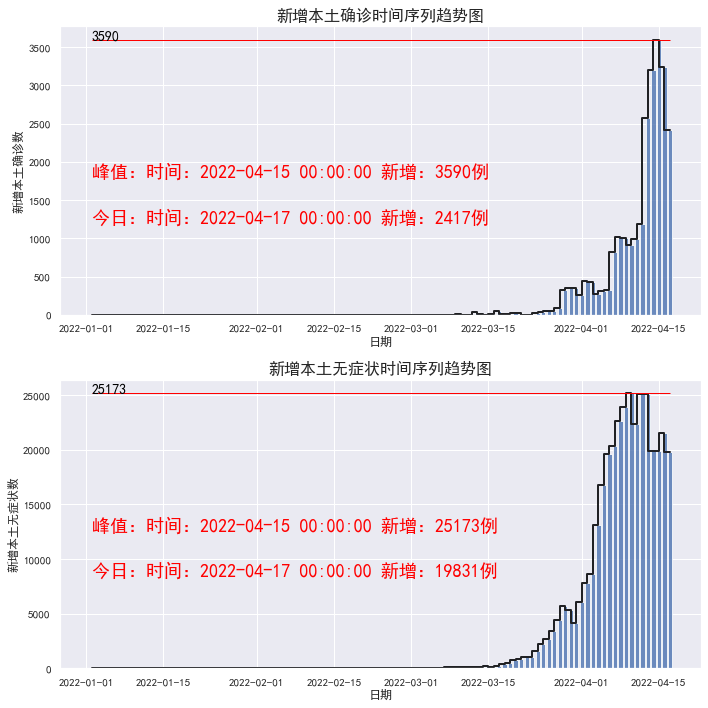

In [11]:
from getdata import GET_csse_covid_19_daily_reports,GET_csse_covid_19_time_series,GET_shanghai_data

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(data_name = 'ts_shanghai_covid', plot=True)  # 这里包含近10天的上海无症状新增趋势！

## 项目提案

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/11.png?raw=true width='800' />
</div>

### Purpose

在启动一个项目之前，要明确这个项目的商业意义和目标。

必须要知道我们在干什么，项目所做的一切都是为了这个目标服务的。

请大家不要忽略proposal的重要性！

<div class="alert alert-block alert-success"><b>Step 3</b>
    
根据你的思考，描述本项目的商业意义：

- 我们要帮谁解决问题？
- 我们要解决什么问题？
- 我们如何解决这些问题？
</div>

### Expectation

在这个项目中，我期望给大家带来点不一样的东西。

也期待大家学到除了数据分析、数据科学方法的tech的基础之外，带着大家更多地去思考，去探索，去解决问题。

> Don't be a coder, be a solver.

<div class="alert alert-block alert-success"><b>Step 3 </b>针对我们现在有的数据，我们能利用现有的资源，提供什么样的解决方案？

请撰写你的 strategy plan（根据下方小贴士）
</div>

关于strategy plan
    
> A strategic plan must give you and your team a simple, clear roadmap of what to do next. At its heart should be a prioritized list of your best ideas and specific steps to achieve your goals.

<div class="alert alert-block alert-info"> 
<p style="font-size:20px; display:inline">💡</p> <b>小贴士：关于strategy plan</b>

战略计划分为三阶段，随着项目进行，我们会不断深入，完善各个阶段的撰写。
 
- Executive Summary（整个项目的Summary，我建议大家每一阶段都整理出来，最后整合）
- Future State Plan（依据每一阶段的进展和现状，展开下一阶段的计划）
- Current State（目前现状）
    
⚠️注意：上述三个阶段在实际进行当中是呈倒序的，而在书面中呈此序。
    
所以你可以尝试按照倒序来写！

</div>

### Outcome

这里给大家讲解一下本项目的建模方法和评估指标

归根结底，这是个最终要用算法模型（后面介绍）训练数据，最后去预测趋势。

那么我们必然要有评估模型好坏的指标，也就是所谓的**Scoring Metric**。

Methods for time series forecasting 有很多，这里分两类：

1. 单变量预测 Univariate-time-series-forecasting
2. 多变量预测 Multivariate time series forecasting

#### 单变量预测

在本节中，我们将重点介绍只能查看目标变量的时间序列预测方法。就是不能包含其他回归量到模型中。


- [Simple Exponential Smoothing (SES)](https://koalatea.io/python-ses-timeseries/)
- [Holt Winter’s Exponential Smoothing (HWES)](https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873)
- [Autoregression (AR)](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/)
- [Moving Average (MA)](https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/)
- [Autoregressive Moving Average (ARMA)](https://www.math.pku.edu.cn/teachers/lidf/course/fts/ftsnotes/html/_ftsnotes/fts-arma.html)
- [Autoregressive integrated moving average (ARIMA)](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)
- [Prophet](https://facebook.github.io/prophet/docs/quick_start.html)


#### 多变量预测

你可以理解为机器学习预测的那一套知识体系！

- Linear
- Tree
- SVM
- NN
- DL

#### 评估指标

- [R-Squared](https://www.investopedia.com/terms/r/r-squared.asp)
- [Mean Absolute Error(MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)
- [Mean Absolute Percentage Error(MAPE)](https://www.statisticshowto.com/mean-absolute-percentage-error-mape/)
- [Mean Squared Error(MSE)](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/mean-squared-error/)
- [Root Mean Squared Error(RMSE)](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/)
- [Normalized Root Mean Squared Error(NRMSE)](https://stats.stackexchange.com/questions/255276/normalized-root-mean-square-error-nrmse-with-zero-mean-of-observed-value)
- [Weighted Absolute Percentage Error(WAPE)](https://stackoverflow.com/questions/68529201/how-to-calculate-wape-for-given-dataframe-in-python)
- [Weighted Mean Absolute Percentage Error(WMAPE)](https://www.baeldung.com/cs/mape-vs-wape-vs-wmape)

点击图片有惊喜哦👇👇👇

<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme.gif?raw=true width='400' />
</div>

<div align=center>
<a href='https://www.xiaohongshu.com/user/profile/6180a092000000001f03501c?xhsshare=CopyLink&appuid=6180a092000000001f03501c&apptime=1650313282'> 
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/followme_xhs.gif?raw=true width = 400/>
</div>